<a href="https://colab.research.google.com/github/rintureji/task1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyst Name : RINTU REJI

#Task 1: Linear Regression
###The task is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.In the given data set, Hours is the independent variable and Marks is the dependent variable

In [ ]:
#importing the required libraries for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
#reading the provided data using read_csv() of pandas
sdata=pd.read_csv("http://bit.ly/w-data")
print("Data is imported")
sdata.head() #shows first 5 data sets


Data is imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#plotting the data sets

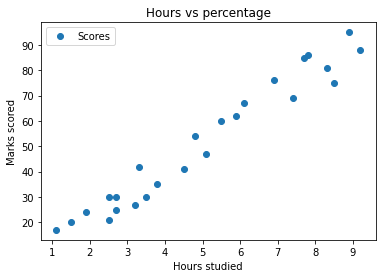

In [ ]:
sdata.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.title('Hours vs percentage')
plt.show()

we can see that the graph has a positive slope

##Dividing data into attributes and labels

In [ ]:
X=sdata.iloc[: , :-1].values #all columns except last column will be selected
y=sdata.iloc[:,1].values
#print(X)
#print(X.shape)

##split the data to training and testing data

In [ ]:
#Here, I used the train_test_split method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #giving 20% of data for testing and 80% for training purpose
#print(y_test)
#print(X_train)

##Training the data

In [ ]:
#importing LinearRegression class 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#finding m and c in the eqn y=mx+c
print("intercept is {}".format(regressor.intercept_))
print("coefficient is {}".format(regressor.coef_))

intercept is 2.018160041434662
coefficient is [9.91065648]


coefficient value indicates that for every one unit of change in hours studied,the change in score is approximately 9.91%

##Plotting regression line

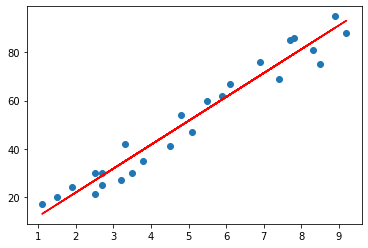

In [ ]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

##Testing Data

In [ ]:
y_pred=regressor.predict(X_test)
# y_pred numpy array contains all the predicted values for the input values of X_test series


##comparing actual output values with the predicted values

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


The predicted percentages are close to the actual ones

##Evaluation of algorithm

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean squaredError:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean squared Error: 21.598769307217456
Root Mean squaredError: 4.647447612100373


since the Root mean squared error is 4.64 which is less than 10% of the mean value of percentages of all students. So, our model is pretty good

In [ ]:
#finding the marks if a student studies for 9.25 hrs 
#y=mx+c
mark=float(regressor.coef_*9.25+regressor.intercept_)
print("predicted marks if a student studies for 9.25 hrs",mark)

predicted marks if a student studies for 9.25 hrs 93.69173248737539
